# Домашна задача 4
## Виртуелни општества 2018/2019
### Андреј Јанчевски - 151003

In [48]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import random

In [49]:
def diffusion_one_by_one(graph, start_nodes, p):
    nx.set_node_attributes(graph, False, name='knowsInfo')
    nx.set_node_attributes(graph, False, name='canInform')
    nx.set_node_attributes(graph, -1, name='iteration')
    for start_node in start_nodes:
        nx.set_node_attributes(graph, {start_node: True}, name='knowsInfo')
        nx.set_node_attributes(graph, {start_node: True}, name='canInform')
        nx.set_node_attributes(graph, {start_node: 0}, name='iteration')
    visited_nodes = []
    nx.set_edge_attributes(graph, False, name='used')
    nx.set_edge_attributes(graph, -1, name='iteration')
    nx.set_edge_attributes(graph, 0, name='rnd')
    i = 0
    stop = False
    while not stop:
        stop = True
        nodes_can_inform = [
            node for node in list(graph.nodes)
            if graph.nodes[node]['canInform']
        ]
        n = len(nodes_can_inform)
        if n > 0:
            chosen_node = random.choice(nodes_can_inform)
            nx.set_node_attributes(graph, {chosen_node: i}, name='iteration')
            neighbors = sorted(dict(graph[chosen_node]).keys())
            for neighbor in neighbors:
                rnd = random.uniform(0, 1)
                if rnd >= p and neighbor not in visited_nodes:
                    stop = False
                    nx.set_node_attributes(
                        graph, {neighbor: True}, name='knowsInfo')
                    nx.set_node_attributes(
                        graph, {neighbor: True}, name='canInform')
                    nx.set_node_attributes(
                        graph, {neighbor: i}, name='iteration')
                    nx.set_edge_attributes(
                        graph, {(chosen_node, neighbor): True}, name='used')
                    nx.set_edge_attributes(
                        graph, {(chosen_node, neighbor): i}, name='iteration')
                    nx.set_edge_attributes(
                        graph, {(chosen_node, neighbor): rnd}, name='rnd')
            nx.set_node_attributes(
                graph, {chosen_node: False}, name='canInform')
            visited_nodes.append(chosen_node)
        i += 1
    informed_nodes = [
        node for node in list(graph.nodes) if graph.nodes[node]['knowsInfo']
    ]
    num_informed_nodes = len(informed_nodes)
    return i, num_informed_nodes, num_informed_nodes / graph.number_of_nodes()

In [50]:
def diffusion_all_neighbors(graph, start_nodes, p):
    nx.set_node_attributes(graph, False, name='knowsInfo')
    nx.set_node_attributes(graph, False, name='canInform')
    nx.set_node_attributes(graph, -1, name='iteration')
    for start_node in start_nodes:
        nx.set_node_attributes(graph, {start_node: True}, name='knowsInfo')
        nx.set_node_attributes(graph, {start_node: True}, name='canInform')
        nx.set_node_attributes(graph, {start_node: 0}, name='iteration')
    visited_nodes = []
    nx.set_edge_attributes(graph, False, name='used')
    nx.set_edge_attributes(graph, -1, name='iteration')
    nx.set_edge_attributes(graph, 0, name='rnd')
    i = 0
    stop = False
    while not stop:
        stop = True
        nodes_can_inform = [
            node for node in list(graph.nodes)
            if graph.nodes[node]['canInform']
        ]
        n = len(nodes_can_inform)
        if n > 0:
            for node in nodes_can_inform:
                nx.set_node_attributes(graph, {node: i}, name='iteration')
                neighbors = sorted(dict(graph[node]).keys())
                for neighbor in neighbors:
                    rnd = random.uniform(0, 1)
                    if rnd >= p and neighbor not in visited_nodes:
                        stop = False
                        nx.set_node_attributes(
                            graph, {neighbor: True}, name='knowsInfo')
                        nx.set_node_attributes(
                            graph, {neighbor: True}, name='canInform')
                        nx.set_node_attributes(
                            graph, {neighbor: i}, name='iteration')
                        nx.set_edge_attributes(
                            graph, {(node, neighbor): True}, name='used')
                        nx.set_edge_attributes(
                            graph, {(node, neighbor): i}, name='iteration')
                        nx.set_edge_attributes(
                            graph, {(node, neighbor): rnd}, name='rnd')
                nx.set_node_attributes(graph, {node: False}, name='canInform')
                visited_nodes.append(node)
            i += 1
    informed_nodes = [
        node for node in list(graph.nodes) if graph.nodes[node]['knowsInfo']
    ]
    num_informed_nodes = len(informed_nodes)
    return i, num_informed_nodes, num_informed_nodes / graph.number_of_nodes()

In [51]:
def plot_graph(graph, title):
    node_label_mapping = dict(
        [(node, node + '\n' + str(graph.nodes[node]["iteration"]))
         for node in list(graph.nodes)])
    graph = nx.relabel_nodes(graph, node_label_mapping)
    edge_label_mapping = dict([(edge, str(graph.edges[edge]["iteration"]) +
                                "\n" + str(round(graph.edges[edge]["rnd"], 4)))
                               for edge in list(graph.edges)])
    node_positions = nx.drawing.layout.spring_layout(
        graph, seed=57, iterations=5000, k=10)
    node_cmap = edge_cmap = plt.get_cmap("cool")
    node_colors = [
        "red" if graph.nodes[node]["knowsInfo"] else "blue"
        for node in list(graph.nodes)
    ]
    edge_colors = [
        "red" if graph.edges[edge]["used"] else "blue"
        for edge in list(graph.edges)
    ]
    plt.figure(1, (16, 9), dpi=int(1920 / 16))
    nx.draw_networkx_nodes(
        graph, pos=node_positions, node_size=1000, node_color=node_colors)
    nx.draw_networkx_labels(graph, pos=node_positions, font_size=8)
    nx.draw_networkx_edges(
        graph, pos=node_positions, width=5, edge_color=edge_colors, alpha=0.5)
    nx.draw_networkx_edge_labels(
        graph, pos=node_positions, edge_labels=edge_label_mapping)
    plt.title(title, fontsize=12)
    plt.axis('off')
    plt.show()

(8, 30, 0.21739130434782608)


C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


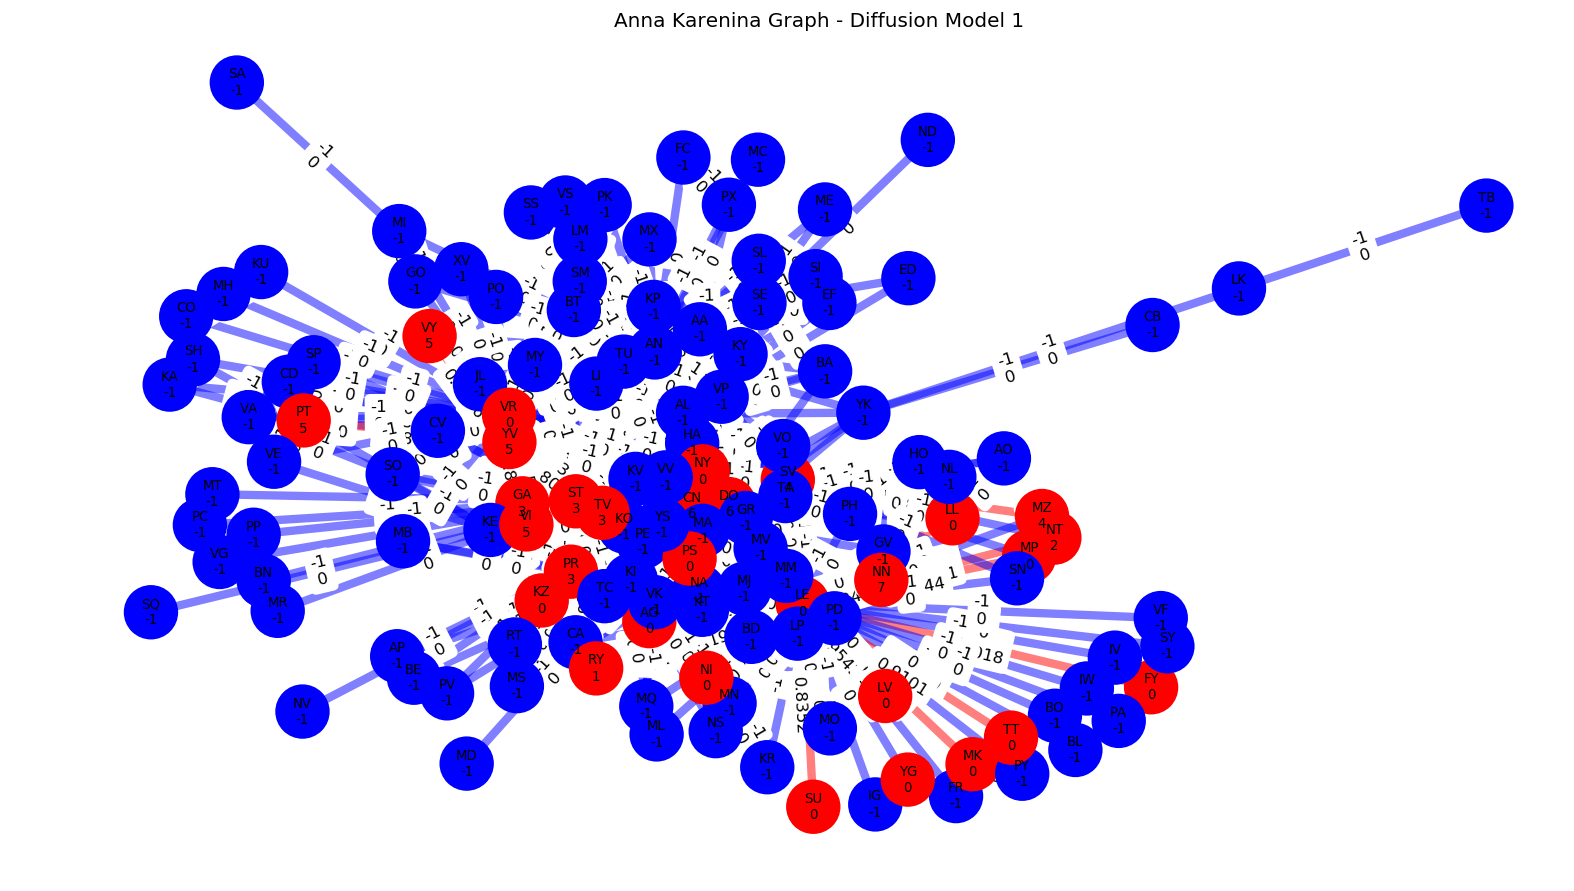

(8, 87, 0.6304347826086957)


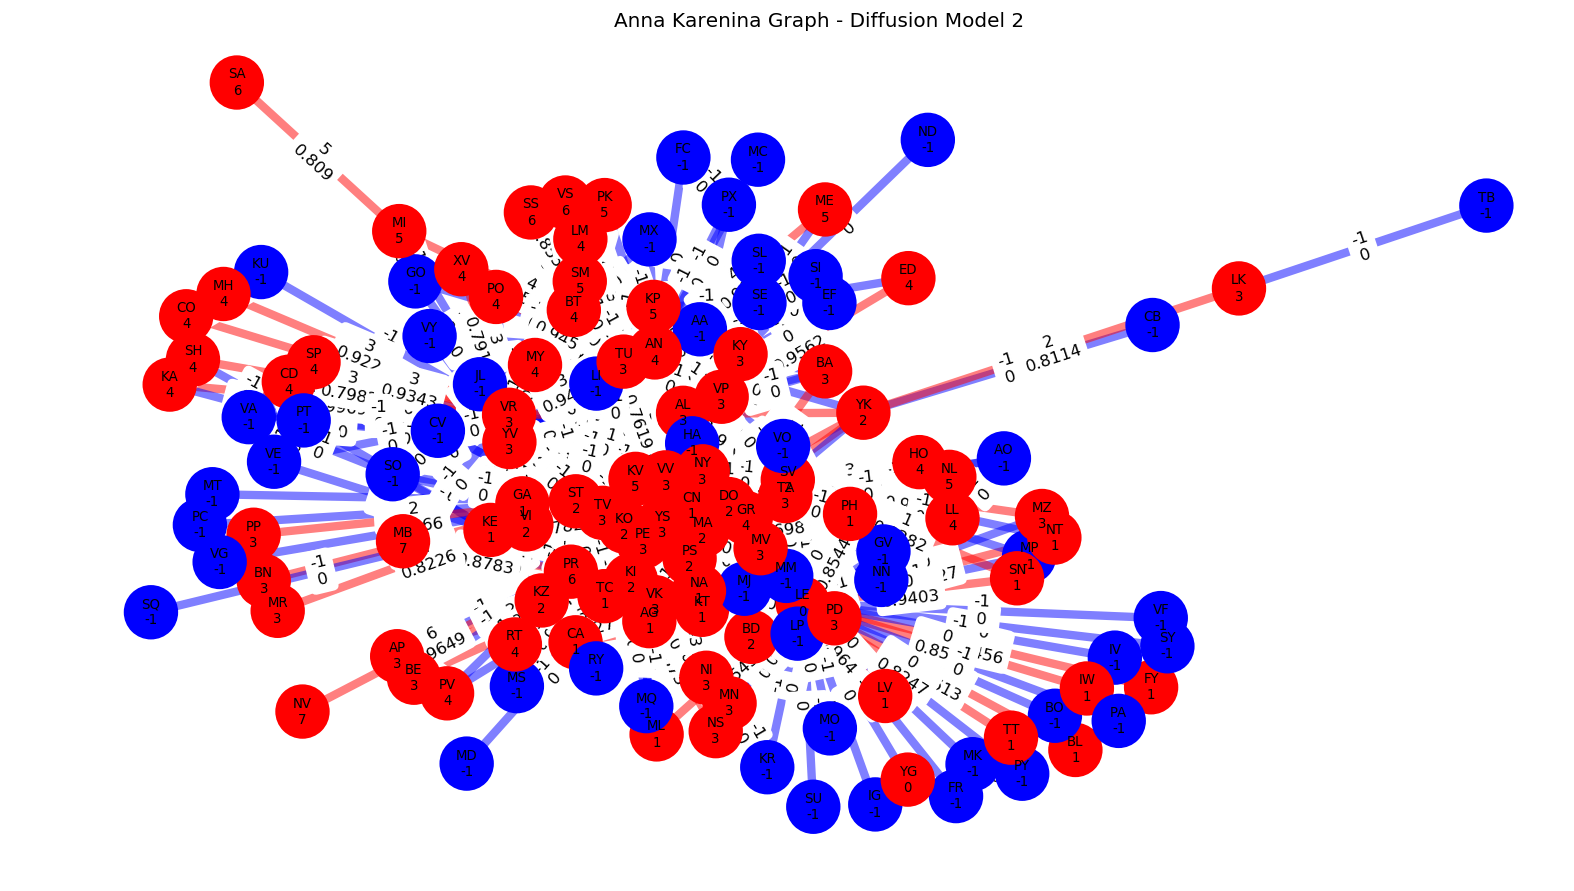

In [52]:
ak_graph = nx.read_gml("anna.gml")
num_nodes = ak_graph.number_of_nodes()
num_edges = ak_graph.number_of_edges()
degrees = dict(nx.degree(ak_graph))
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
most_connected = degrees[0][0]
least_connected = degrees[num_nodes - 1][0]
print(diffusion_one_by_one(ak_graph, [most_connected, least_connected], 0.75))
plot_graph(ak_graph, "Anna Karenina Graph - Diffusion Model 1")
ak_graph = nx.read_gml("anna.gml")
num_nodes = ak_graph.number_of_nodes()
num_edges = ak_graph.number_of_edges()
degrees = dict(nx.degree(ak_graph))
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
most_connected = degrees[0][0]
least_connected = degrees[num_nodes - 1][0]
print(
    diffusion_all_neighbors(ak_graph, [most_connected, least_connected], 0.75))
plot_graph(ak_graph, "Anna Karenina Graph - Diffusion Model 2")

(5, 8, 0.5333333333333333)


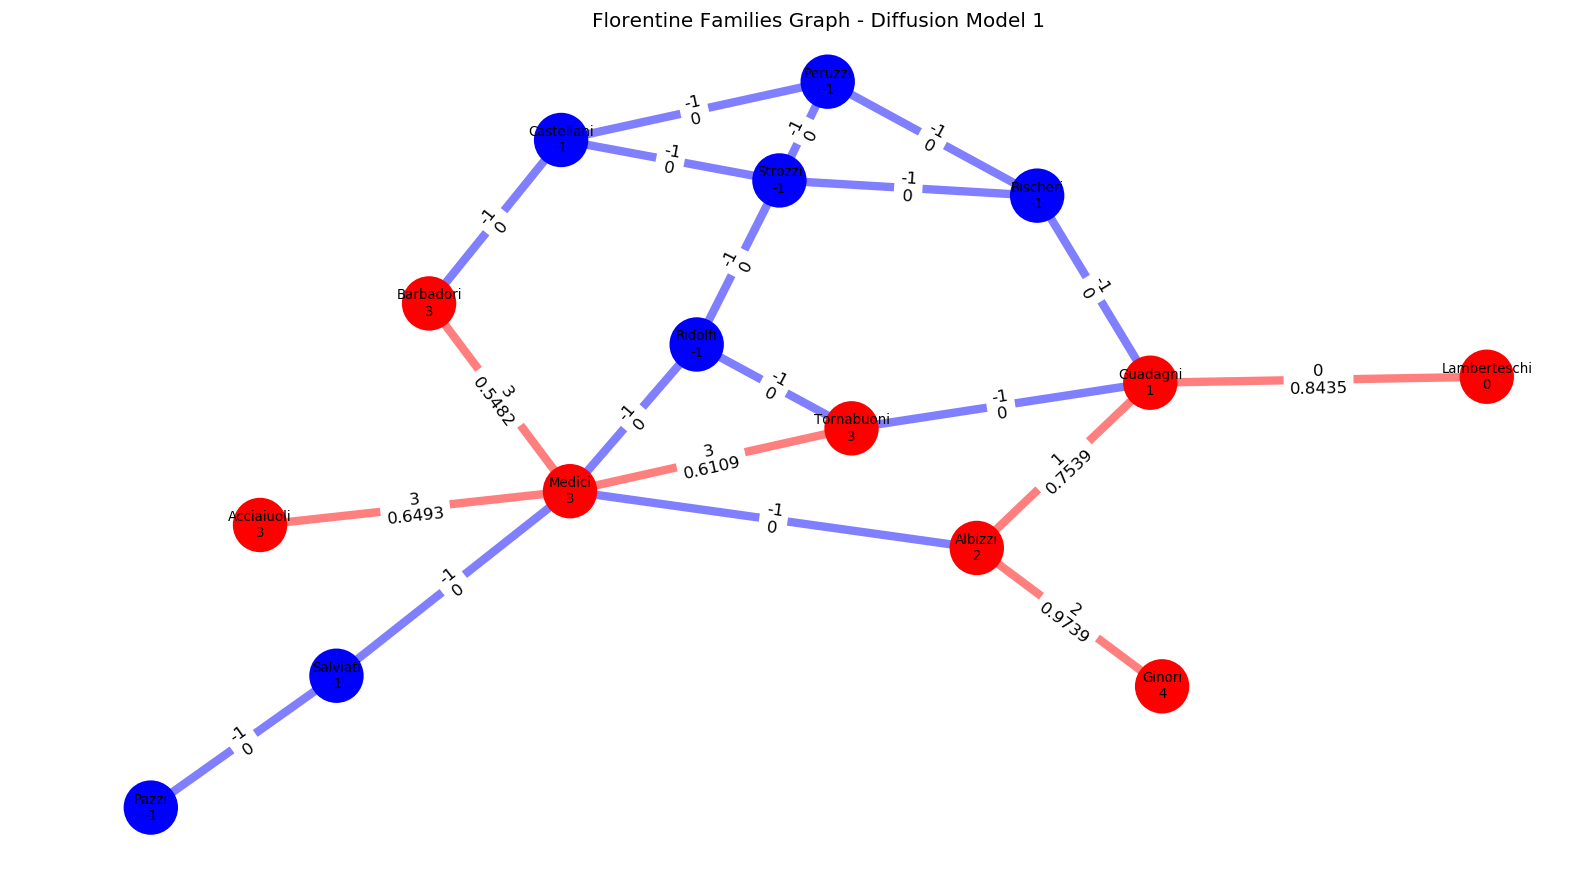

(5, 10, 0.6666666666666666)


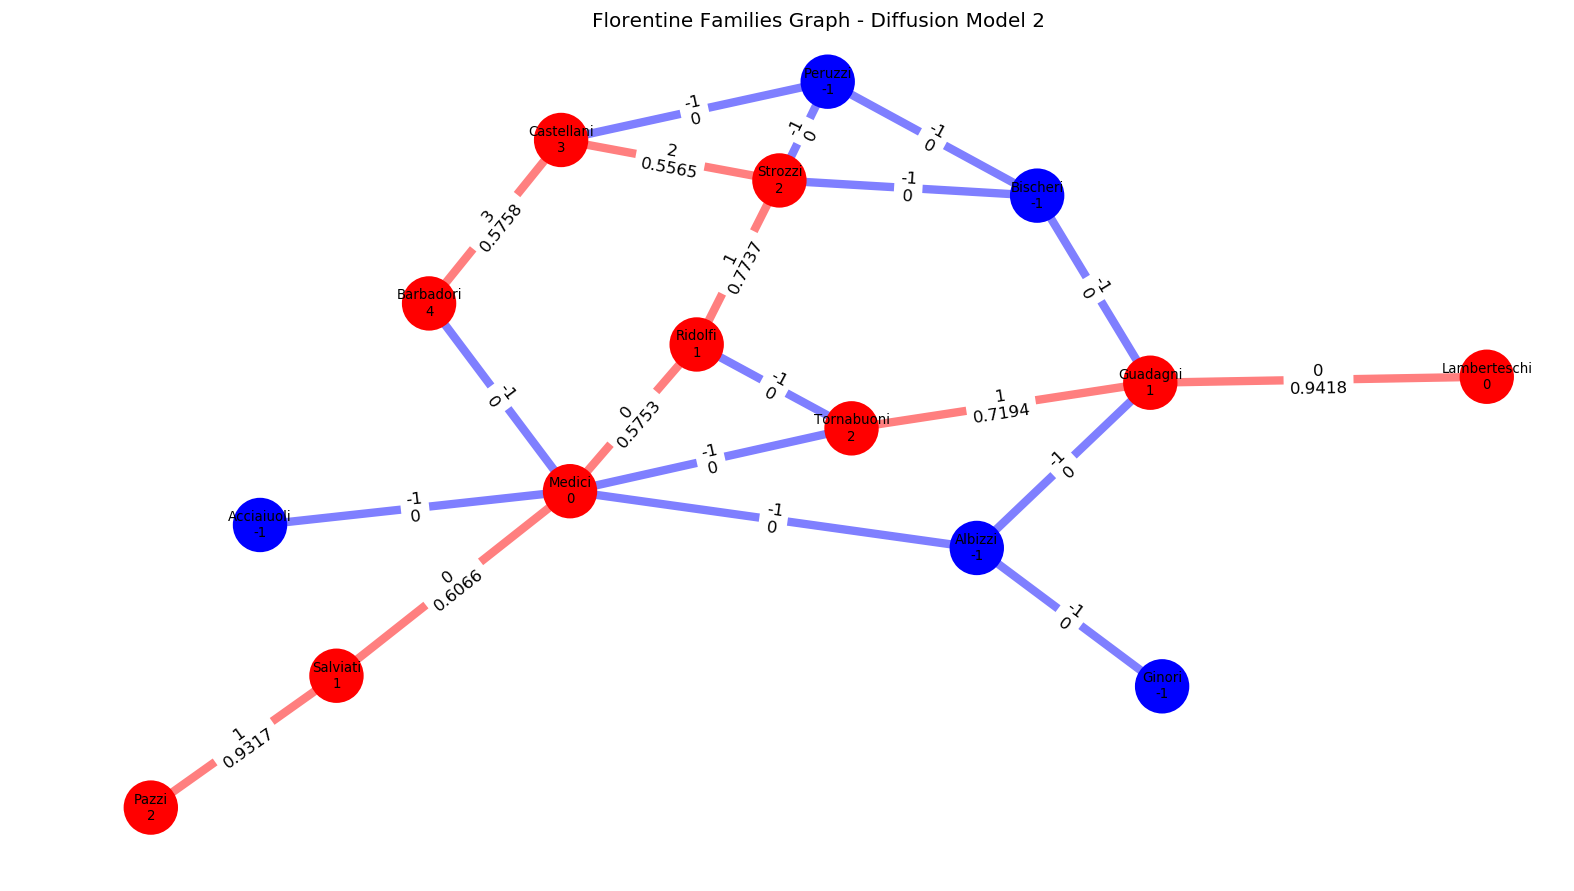

In [6]:
ff_graph = nx.florentine_families_graph()
num_nodes = ff_graph.number_of_nodes()
num_edges = ff_graph.number_of_edges()
degrees = dict(nx.degree(ff_graph))
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
most_connected = degrees[0][0]
least_connected = degrees[num_nodes - 1][0]
print(diffusion_one_by_one(ff_graph, [most_connected, least_connected], 0.5))
plot_graph(ff_graph, "Florentine Families Graph - Diffusion Model 1")
ff_graph = nx.florentine_families_graph()
num_nodes = ff_graph.number_of_nodes()
num_edges = ff_graph.number_of_edges()
degrees = dict(nx.degree(ff_graph))
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
most_connected = degrees[0][0]
least_connected = degrees[num_nodes - 1][0]
print(
    diffusion_all_neighbors(ff_graph, [most_connected, least_connected], 0.5))
plot_graph(ff_graph, "Florentine Families Graph - Diffusion Model 2")

In [25]:
class Queue:
    class QueueNode:
        def __init__(self, data):
            self.data = data
            self.succ = None

    def __init__(self):
        self.front = None
        self.rear = None
        self.length = 0

    def empty(self):
        return self.length == 0

    def enqueue(self, elem):
        node = self.QueueNode(elem)
        if (self.length == 0):
            self.front = node
            self.rear = node
        else:
            self.rear.succ = node
            self.rear = self.rear.succ
        self.length += 1

    def dequeue(self):
        elem = self.front.data
        if (self.length == 1):
            self.front = None
            self.rear = None
        else:
            self.front = self.front.succ
        self.length -= 1
        return elem

    def __str__(self):
        elems = []
        node = self.front
        while node is not None:
            elems.append(node.data)
            node = node.succ
        return str(elems)


def diffusion_consensus(graph, until_convergence=False):
    oppinions = {node: random.randint(0, 1) for node in list(graph.nodes)}
    nx.set_node_attributes(graph, oppinions, name='oppinion')
    nx.set_node_attributes(graph, -1, name='iteration')
    nx.set_edge_attributes(graph, -1, name='iteration')
    degrees = dict(nx.degree(graph))
    degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    start_node = degrees[0][0]
    convergence = False
    iterations_until_convergence = 0
    previous_oppinions = []
    while not convergence:
        iterations_until_convergence += 1
        node_queue = Queue()
        node_queue.enqueue(start_node)
        visited_nodes = []
        i = 0
        while not node_queue.empty():
            node = node_queue.dequeue()
            nx.set_node_attributes(graph, {node: i}, name='iteration')
            oppinion_counts = {0: 0, 1: 0}
            neighbors = sorted(dict(graph[node]).keys())
            for neighbor in neighbors:
                oppinion_counts[graph.nodes[neighbor]['oppinion']] += 1
                if neighbor not in visited_nodes:
                    node_queue.enqueue(neighbor)
                    nx.set_edge_attributes(
                        graph, {(node, neighbor): i}, name='iteration')
            nx.set_node_attributes(
                graph,
                {node: max(oppinion_counts.items(), key=lambda x: x[1])[0]},
                name='oppinion')
            visited_nodes.append(node)
            i += 1
        if not until_convergence:
            break
        else:
            convergence = True
            oppinions = list(
                nx.get_node_attributes(graph, 'oppinion').values())
            #for i in range(1, len(oppinions)):
            #    if oppinions[i] != oppinions[i - 1]:
            #        convergence = False
            #        break
            if oppinions != previous_oppinions:
                convergence = False
            previous_oppinions = list(oppinions)
    return iterations_until_convergence

In [26]:
def plot_graph_consensus(graph, title):
    node_label_mapping = dict(
        [(node, str(node) + '\n' + str(graph.nodes[node]["iteration"]))
         for node in list(graph.nodes)])
    graph = nx.relabel_nodes(graph, node_label_mapping)
    edge_label_mapping = dict([(edge, str(graph.edges[edge]["iteration"]))
                               for edge in list(graph.edges)])
    node_positions = nx.drawing.layout.spring_layout(
        graph, seed=57, iterations=5000, k=10)
    node_colors = [
        "red" if graph.nodes[node]["oppinion"] else "blue"
        for node in list(graph.nodes)
    ]
    plt.figure(1, (16, 9), dpi=int(1920 / 16))
    nx.draw_networkx_nodes(
        graph, pos=node_positions, node_size=1000, node_color=node_colors)
    nx.draw_networkx_labels(graph, pos=node_positions, font_size=8)
    nx.draw_networkx_edges(
        graph, pos=node_positions, width=5, edge_color="black", alpha=0.5)
    nx.draw_networkx_edge_labels(
        graph, pos=node_positions, edge_labels=edge_label_mapping)
    plt.title(title, fontsize=12)
    plt.axis('off')
    plt.show()

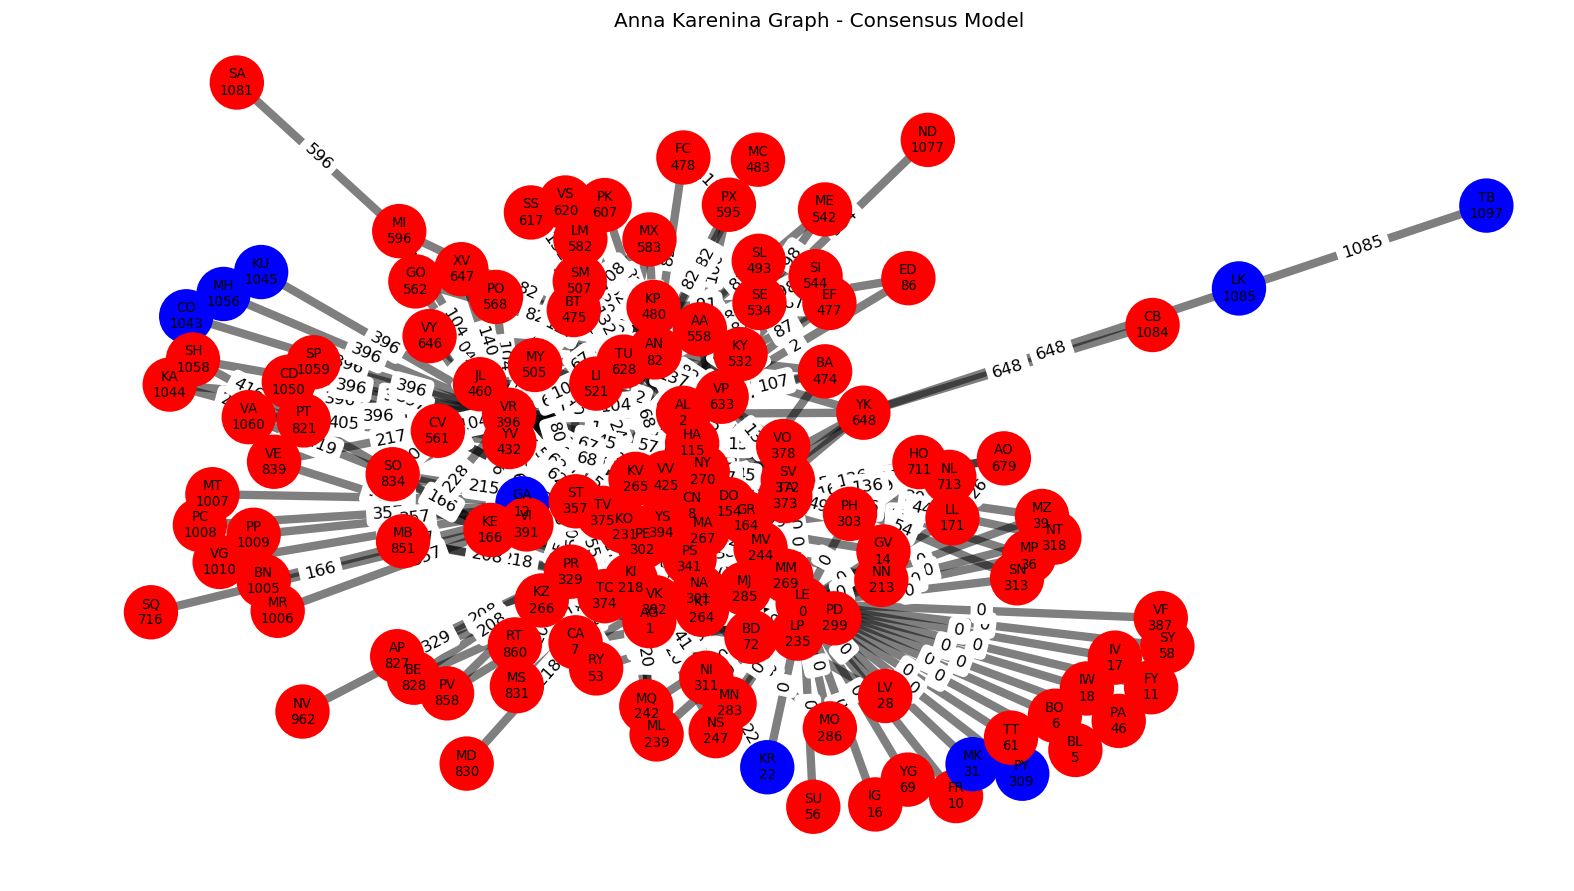

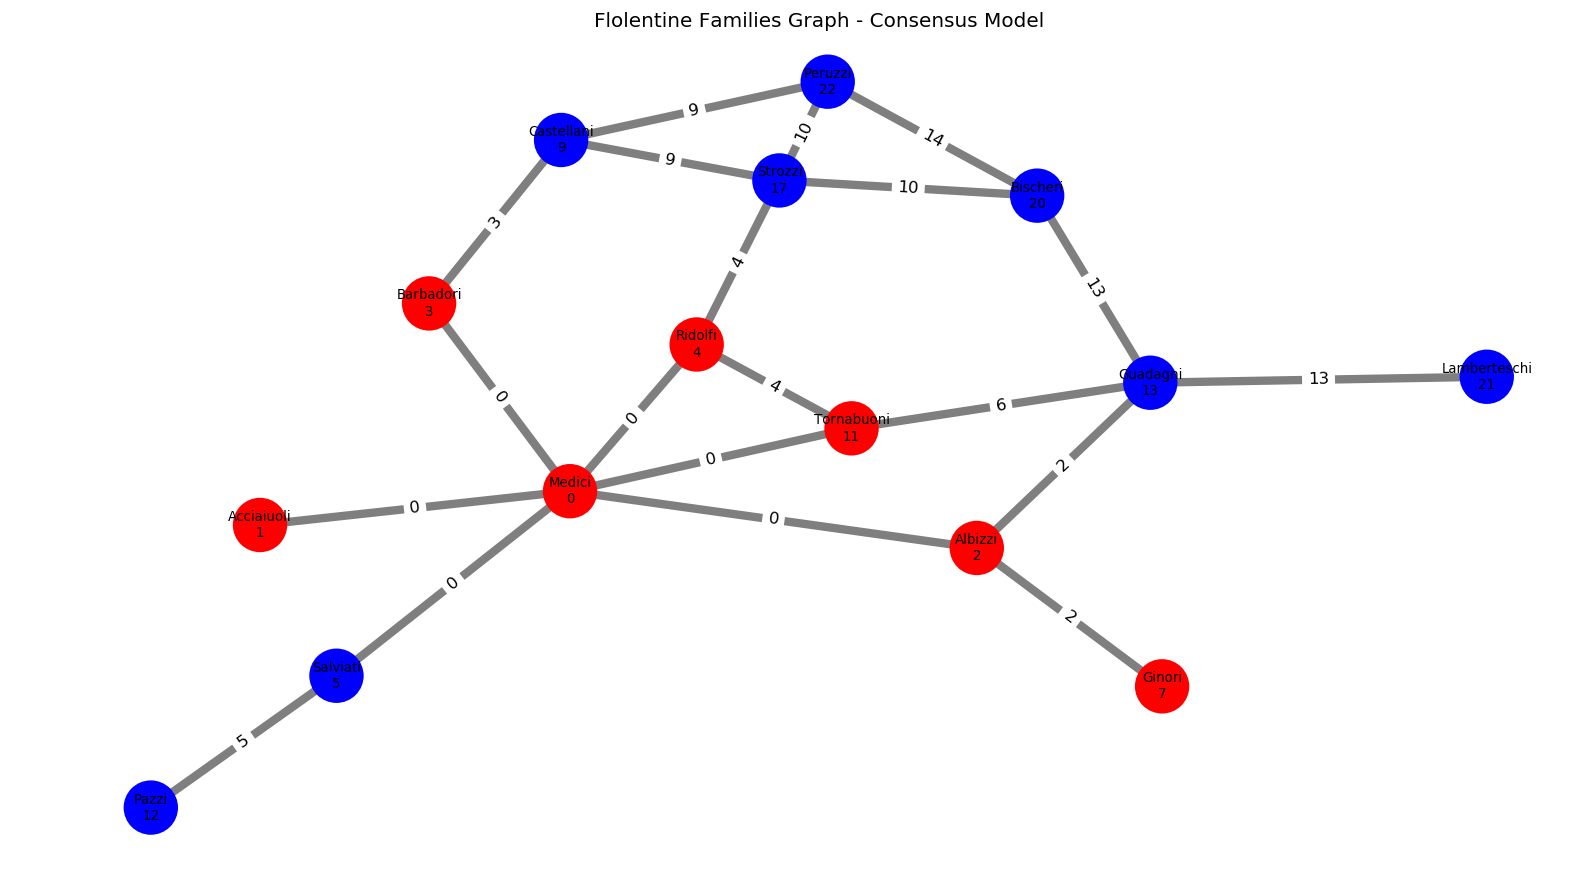

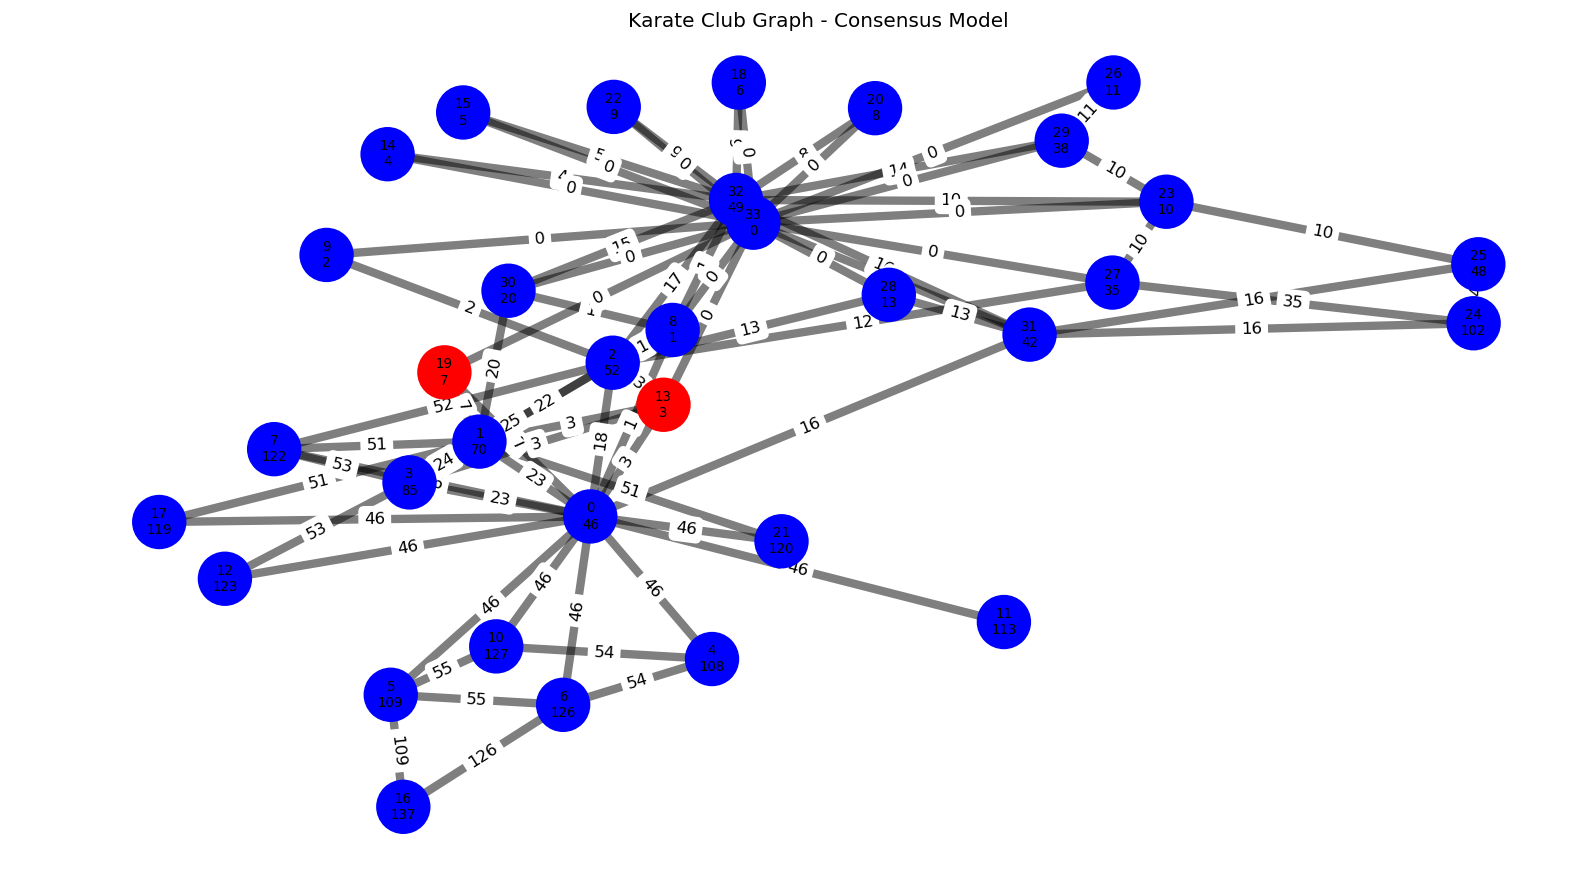

In [47]:
ak_graph = nx.read_gml("anna.gml")
diffusion_consensus(ak_graph)
plot_graph_consensus(ak_graph, "Anna Karenina Graph - Consensus Model")
ff_graph = nx.florentine_families_graph()
diffusion_consensus(ff_graph)
plot_graph_consensus(ff_graph, "Flolentine Families Graph - Consensus Model")
kc_graph = nx.karate_club_graph()
diffusion_consensus(kc_graph)
plot_graph_consensus(kc_graph, "Karate Club Graph - Consensus Model")

3


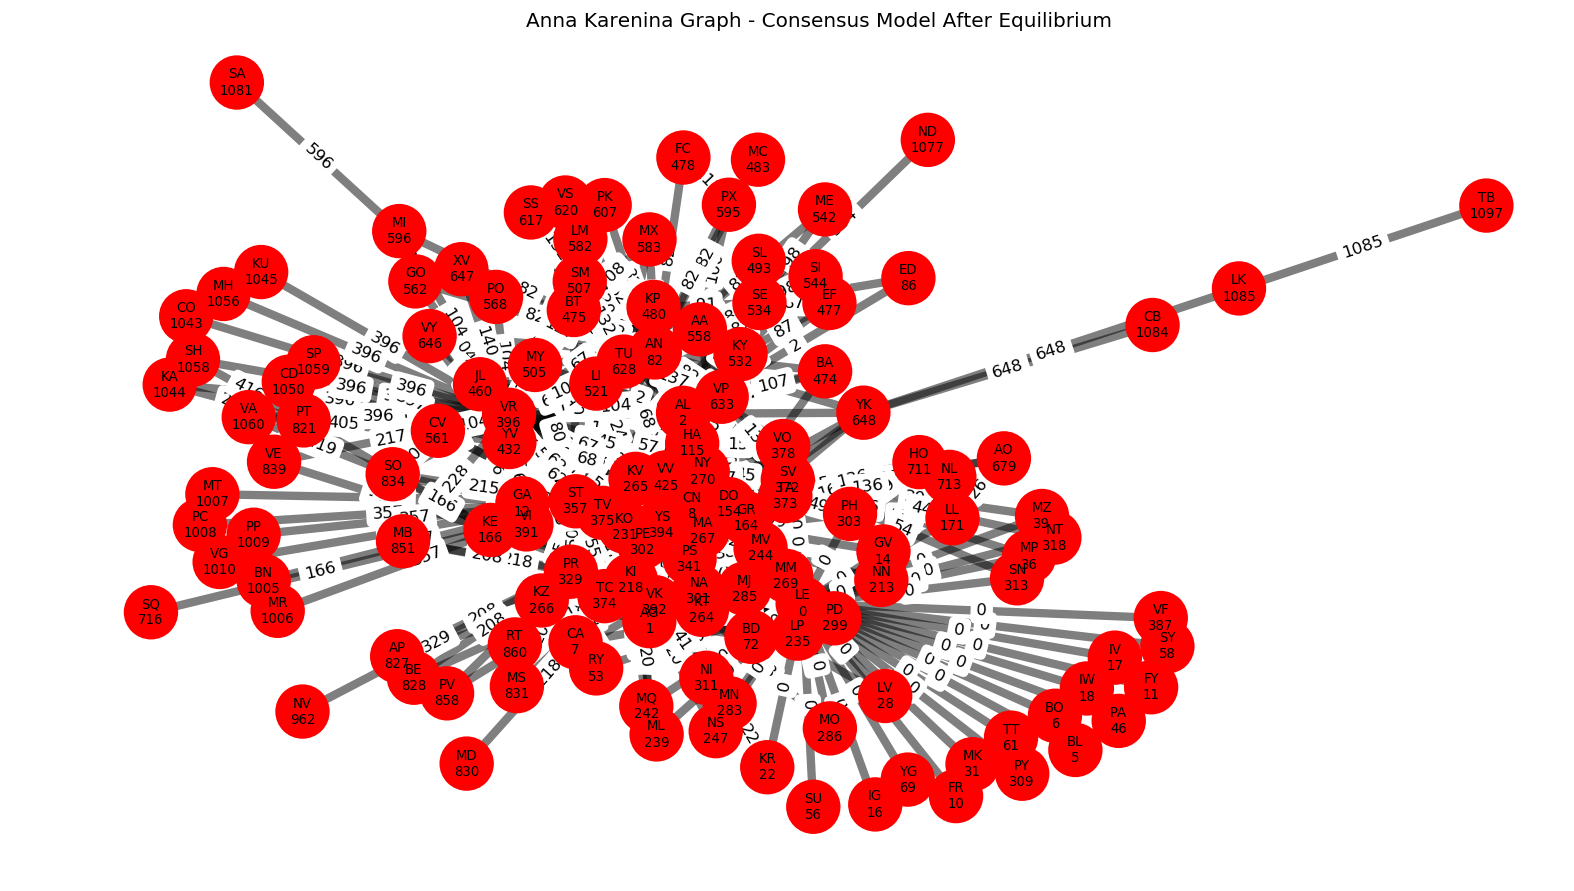

In [44]:
ak_graph = nx.read_gml("anna.gml")
print(diffusion_consensus(ak_graph, until_convergence=True))
plot_graph_consensus(
    ak_graph, "Anna Karenina Graph - Consensus Model After Equilibrium")

3


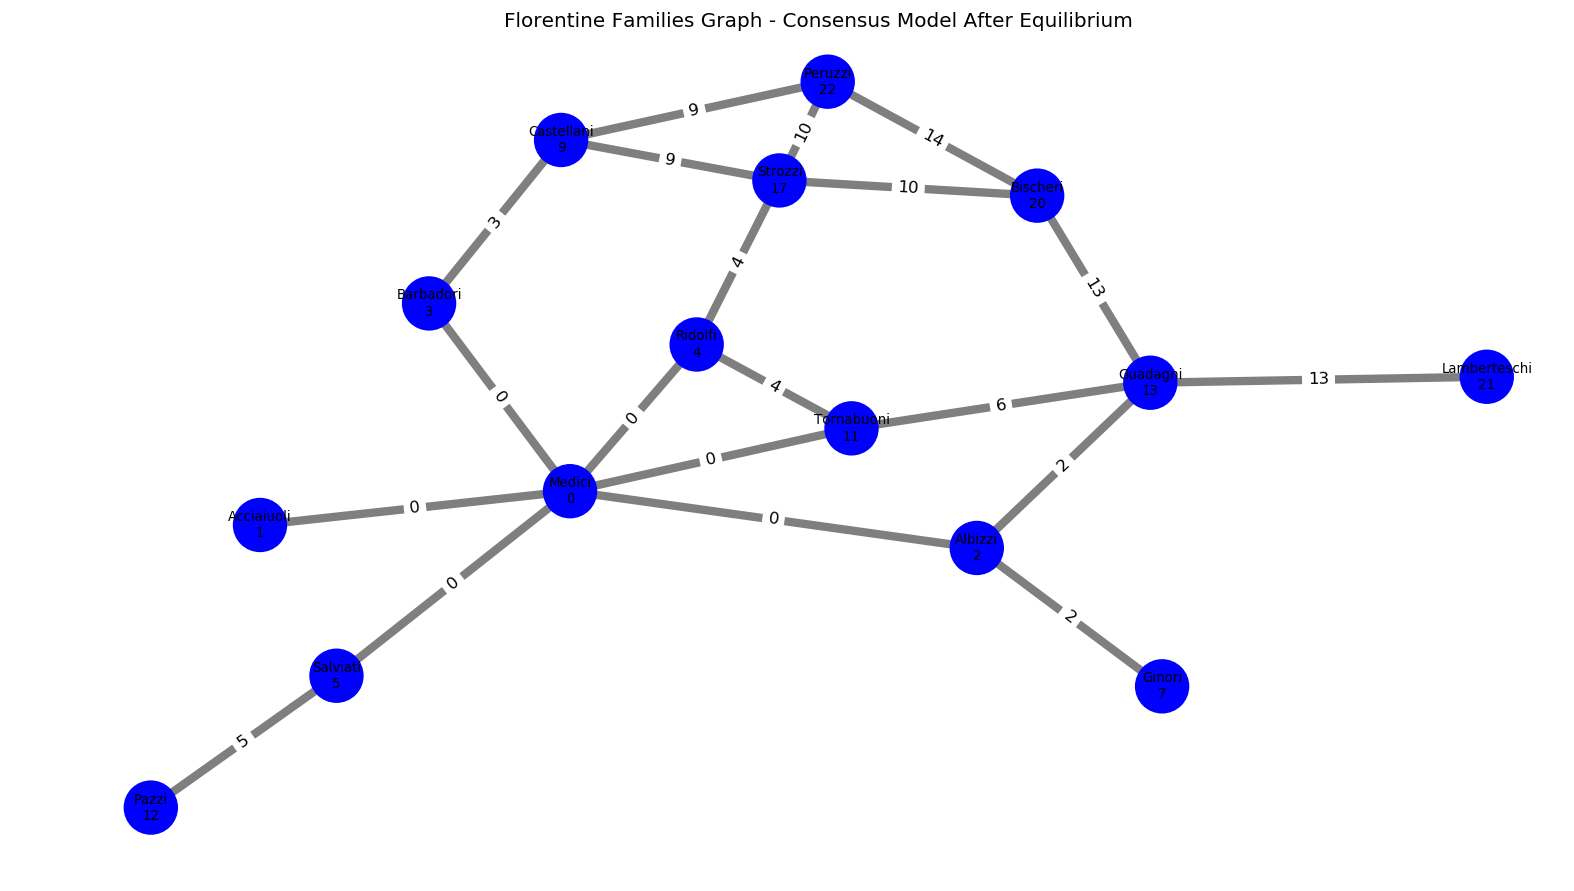

In [42]:
ff_graph = nx.florentine_families_graph()
print(diffusion_consensus(ff_graph, until_convergence=True))
plot_graph_consensus(
    ff_graph, "Florentine Families Graph - Consensus Model After Equilibrium")

3


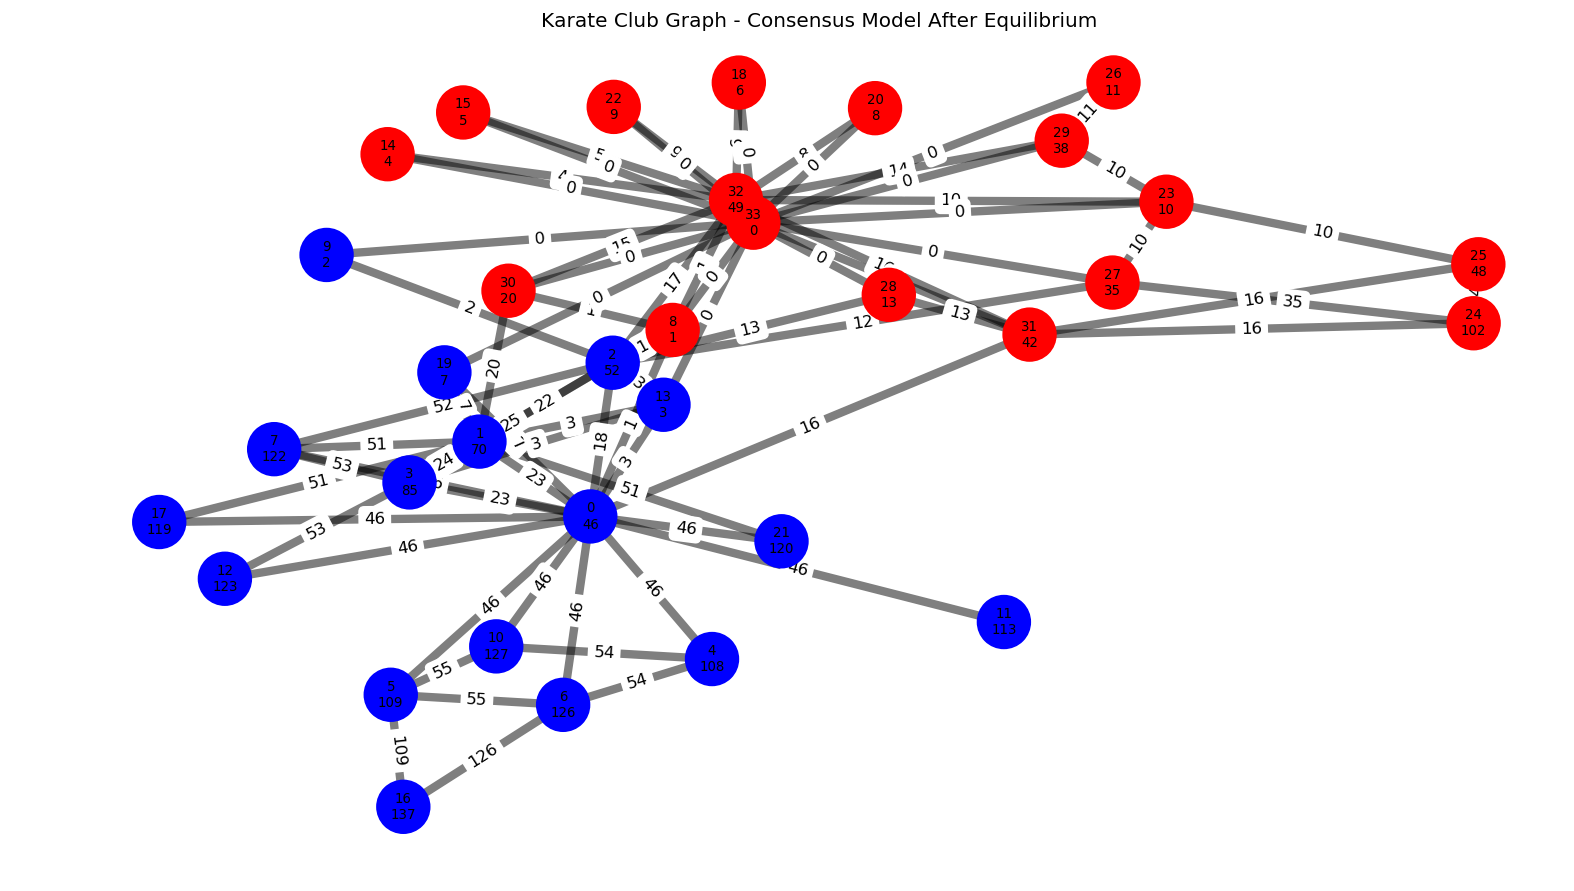

In [39]:
kc_graph = nx.karate_club_graph()
print(diffusion_consensus(kc_graph, until_convergence=True))
plot_graph_consensus(kc_graph,
                     "Karate Club Graph - Consensus Model After Equilibrium")